<a href="https://colab.research.google.com/github/SrijanxxxSharma/Heart_disease_classification/blob/main/Copy_of_Heart_disease_classifier_V4final_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart disease dataset**

### This data set can be found in my Github repository as https://github.com/SrijanxxxSharma/Heart_disease_classification.

Looking at the data it is quite clear that this is a classification problem(target column is a categorical column). 8 of its columns are categorical(0,1,2,3...) while remaining 5 are continuous numeric column.

  Since we don't have a lot of features we won't use any DR(dimension reduction). We'll just scale 5 of our features which are continuous(standardizing).

In [1]:
import pandas as pd
import numpy as np
url = "https://github.com/SrijanxxxSharma/Heart_disease_classification/raw/main/heart-disease-dataset.csv"
raw_data=pd.read_csv(url)
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#***Null Value handler***

If any of the features have null value in it then it is definitely a problem. So we may impute it or just drop the feature if it is mostly useless.

**But Keep in mind just don't randomly apply a solution without visualization and analysing that feature**

In [2]:
# Sample Data

data_tt = {'Name':['Tom', 'nick', 'krish', 'jack','ram','sham','dhanram'],
        'Age':[20, 28, 19, 18,None,None,None],
        'occu':[1,2,1,4,3,None,1],
        'edu':[1,1,1,1,1,8,1],
        'birth':[None,None,None,None,None,None,2],
        'fitness':[1,2,3,1,1,8,1],
        'record':[1,5,4,1,1,8,1]
        }
start_col=0
end_col=2
# Create DataFrame
df = pd.DataFrame(data_tt)
df

,Name,Age,occu,edu,birth,fitness,record
0,Tom,20.0,1.0,1,NaN,1,1
1,nick,28.0,2.0,1,NaN,2,5
2,krish,19.0,1.0,1,NaN,3,4
3,jack,18.0,4.0,1,NaN,1,1
4,ram,NaN,3.0,1,NaN,1,1
5,sham,NaN,NaN,8,NaN,8,8
6,dhanram,NaN,1.0,1,2.0,1,1


# Data Cleaner using imputation or droping.

In [3]:
class NullHandler:
  def __init__(self,drop=False,mean_impute=False,median_impute=False):
    self.drop=drop
    self.mean_impute=mean_impute
    self.median_impute=median_impute
    self.flag_drop=False
  
  
  def fit(self, data):
    no_col=len(data.columns)
    flags=[None]*no_col
    for i in range(0,no_col):
      check=list(pd.isnull(data.iloc[:,i]).unique())
      flag=False
      for j in check:
        if j==True:
          flag=True
      if flag:
        flags[i]=True
    
    # Dropping
    k=0
    if self.drop:
      self.flag_drop=True
      for i in range(0,no_col):
        if flags[i]==True:
          data.drop(data.columns[i-k],axis=1,inplace=True)
          k+=1
    
    if self.flag_drop==False:
  # Imputing with mean
      if self.mean_impute:
        for i in range(0,no_col):
          if flags[i]==True:
            c=data[data.iloc[:,i].isnull()].iloc[:,i]
            index=c.index[:]
            data.iloc[list(index),i]=0
            mean=(data.iloc[:,i].sum())/(len(data.iloc[:,i])-len(index))
            data.iloc[list(index),i]=mean

  # Imputing with median
      if self.median_impute:
        for i in range(0,no_col):
          if flags[i]==True:
            c=data[data.iloc[:,i].isnull()].iloc[:,i]
            index=c.index[:]
            l=list(data.iloc[:,i])
            for j in index:
              l[j]=float('inf')
            l.sort()
            if (len(l)-len(index))%2==0:
              median=(l[((len(l)-len(index))//2-1)]+l[(len(l)-len(index))//2])/2
            else:
              median=l[((len(l)-len(index))-1)//2]
            data.iloc[list(index),i]=median

    self.flag_drop=False
    return data
          # print(list(index))
          # data.iloc[list(index),i]=np.inf

data123=df.copy()
o=NullHandler(drop=True,mean_impute=True,median_impute=True)
data321=o.fit(data123)
data321

,Name,edu,fitness,record
0,Tom,1,1,1
1,nick,1,2,5
2,krish,1,3,4
3,jack,1,1,1
4,ram,1,1,1
5,sham,8,8,8
6,dhanram,1,1,1


#Now we will use train test split for creating 3 sets
1.Training set.(70% of data)

2.Test set.(20% of data)

3.Validation set.(10% of data)

In [4]:
from sklearn.model_selection import train_test_split

target=raw_data.target
features=raw_data.drop("target",axis=1)

# Spliting the data into train and remain sets
X_train, X_remain, y_train, y_remain = train_test_split(features, target, test_size=0.30, random_state=42)

#spliting test set into test and validation test

X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size=0.34, random_state=42)
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)



#preprocessing






Now we extract continuous variables and convert them to numpy array to scale them.

In [5]:
class Preprocess:
  def __init__(self, data):
    self.raw_data=data

  def fit(self, k=1,StandardScaler=False, MinMaxScaler=True):
    if MinMaxScaler:
          #extracting continuous variables as list of numpy arrays  
      continuous_data=[self.raw_data[members].to_numpy() for members in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
      
      #scaling
      name=['Scaled_age', 'Scaled_trestbps', 'Scaled_chol', 'Scaled_thalach', 'Scaled_oldpeak']
      i=0
      for feature in continuous_data:
        new=k*(feature-np.min(feature))/(np.max(feature)-np.min(feature))
        ###new=(4*feature-feature.mean())/feature.std()
        self.raw_data=pd.concat([self.raw_data,pd.DataFrame(new, columns = [name[i]])], axis=1)
        i+=1
      columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
      self.raw_data.drop(columns,inplace=True,axis=1)
    else:
          #extracting continuous variables as list of numpy arrays  
      continuous_data=[self.raw_data[members].to_numpy() for members in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
      
      #scaling
      name=['Scaled_age', 'Scaled_trestbps', 'Scaled_chol', 'Scaled_thalach', 'Scaled_oldpeak']
      i=0
      for feature in continuous_data:
        ###new=3*(feature-np.min(feature))/(np.max(feature)-np.min(feature))
        new=(k*feature-feature.mean())/feature.std()
        self.raw_data=pd.concat([self.raw_data,pd.DataFrame(new, columns = [name[i]])], axis=1)
        i+=1
      columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
      self.raw_data.drop(columns,inplace=True,axis=1)

    return self.raw_data
print(X_train.shape)
processor1= Preprocess(data=X_train)
X_train_scaled_data = processor1.fit(k=4)

processor2= Preprocess(data=X_val)
X_val_scaled_data = processor2.fit(k=4)

processor3= Preprocess(data=X_test)
X_test_scaled_data = processor3.fit(k=4)



print(X_train_scaled_data.shape)
print(X_val_scaled_data.shape)
print(X_test_scaled_data.shape)
X_train_scaled_data

# def preprocess(raw_data):
#   #extracting continuous variables as list of numpy arrays  
#   continuous_data=[raw_data[members].to_numpy() for members in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
  
#   #scaling
#   name=['Scaled_age', 'Scaled_trestbps', 'Scaled_chol', 'Scaled_thalach', 'Scaled_oldpeak']
#   i=0
#   for feature in continuous_data:
#     new=3*(feature-np.min(feature))/(np.max(feature)-np.min(feature))
#     #new=(4*feature-feature.mean())/feature.std()
#     raw_data=pd.concat([raw_data,pd.DataFrame(new, columns = [name[i]])], axis=1)
#     i+=1
#   columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#   raw_data.drop(columns,inplace=True,axis=1)
#   return raw_data

# scaled_data = preprocess(X_train) 

(717, 13)
(717, 13)
(105, 13)
(203, 13)


,sex,cp,fbs,restecg,exang,slope,ca,thal,Scaled_age,Scaled_trestbps,Scaled_chol,Scaled_thalach,Scaled_oldpeak
0,1,1,0,1,1,2,0,2,2.500000,1.735849,1.305842,2.839695,0.000000
1,1,0,0,0,1,1,3,3,2.416667,1.283019,1.237113,1.832061,1.419355
2,0,2,0,1,0,1,1,2,1.250000,0.905660,1.594502,2.381679,0.193548
3,1,2,0,1,0,1,1,3,1.750000,1.735849,1.470790,2.809160,0.387097
4,0,2,0,1,0,1,0,2,1.166667,1.056604,1.195876,2.870229,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,1,2,0,0,0,1,0,2,1.000000,1.358491,1.209622,2.961832,1.290323
713,1,0,0,0,1,2,1,3,2.666667,1.735849,1.113402,2.045802,1.225806
714,1,0,0,1,1,2,0,3,1.833333,1.735849,2.378007,3.114504,1.032258
715,1,0,0,1,0,2,0,3,1.166667,0.603774,1.168385,2.748092,0.000000


## Error analysis
We use mean squared error to analyse our model


In [6]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as err
def sq_err_per(original,predictions):
  return 100*mse(original,predictions)

def err_per(original,predictions):
  return 100*err(original,predictions)

# Now Model
Now we have nicely scaled data as scaled_data. We will use classifiers to train our Model.

1.K Nearest Neighbour

2.Logistic Regression

3.Naïve Bayes

4.Support Vector Machine

5.Decision Tree

6.Random Forest

7.XGboost 

## K NearestNeighbours(86.69% accuracy)

This classifier has simple concept. It checks the neighbouring point's label using Eucledean distance. Here K is number if neighbours one wants to consider.

#Curse of Dimensionality

KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.

In [7]:

# Import relavent model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model = KNeighborsClassifier(n_neighbors=10)

# Now fit in each point
model.fit(X_train_scaled_data,y_train)
# Now predict for test set but remember to preprocess it else it will be a disaster
predictions = model.predict(X_test_scaled_data)
cm = metrics.confusion_matrix(y_test, predictions)#Confusion metrics

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)

86.69950738916256
86.69950738916256
[[96 16]
 [11 80]]


# Logistic regressor(79.8% accuracy)

Logistic Regression is used when the dependent variable(target) is categorical.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model2=LogisticRegression()
model2.fit(X_train_scaled_data,y_train)

# Now predict for test set but remember to preprocess it else it will be a disaster
predictions = model2.predict(X_test_scaled_data)

cm = metrics.confusion_matrix(y_test, predictions)#Confusion metrics

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)

79.80295566502463
79.80295566502463
[[79 33]
 [ 8 83]]


# Naïve Bayes(78.3% accuracy)
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

We make two assumptions here, one as stated above we consider that these predictors are independent. That is, if the temperature is hot, it does not necessarily mean that the humidity is high. Another assumption made here is that all the predictors have an equal effect on the outcome. 

In [9]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()
model3.fit(X_train_scaled_data,y_train)



# Now predict for test set but remember to preprocess it else it will be a disaster
predictions = model3.predict(X_test_scaled_data)

cm = metrics.confusion_matrix(y_test, predictions)#Confusion metrics

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)

78.32512315270935
78.32512315270935
[[86 26]
 [18 73]]


#Support Vector Machines(84.2%)
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.




In [10]:
from sklearn import svm
from sklearn import metrics
model4=svm.SVC()#SVC is support vector classifier
model4.fit(X_train_scaled_data,y_train)
predictions=model4.predict(X_test_scaled_data)

cm=metrics.confusion_matrix(y_test,predictions)

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)


84.23645320197045
84.23645320197045
[[85 27]
 [ 5 86]]


# Decision Trees(81.7%)

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model5=DecisionTreeClassifier(criterion="entropy", max_depth=5)

model5.fit(X_train_scaled_data,y_train)
predictions=model5.predict(X_test_scaled_data)

cm=metrics.confusion_matrix(y_test,predictions)

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)


81.77339901477832
81.77339901477832
[[82 30]
 [ 7 84]]


#Random forest classifier(94.05%)

*   List item
*   List item



It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model6=RandomForestClassifier(n_estimators=100)

model6.fit(X_train_scaled_data,y_train)
predictions=model6.predict(X_test_scaled_data)

cm=metrics.confusion_matrix(y_test,predictions)

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)

93.10344827586206
93.10344827586206
[[101  11]
 [  3  88]]


#XGBoost(84%)
They are boosting trees. Boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

Basic version is applied here for simplicity.

In [13]:
import xgboost as xgb
from sklearn import metrics

model7=gb_model = xgb.XGBClassifier(objective="binary:logistic")

model7.fit(X_train_scaled_data,y_train)
predictions=model7.predict(X_test_scaled_data)

cm=metrics.confusion_matrix(y_test,predictions)

#printing errors
print((100-sq_err_per(y_test, predictions)))
print((100-err_per(y_test, predictions)))
print(cm)

84.72906403940887
84.72906403940887
[[87 25]
 [ 6 85]]


#Initial Conclusion
 
 On fine tuning scaled data(min-max scaler with some twicks) we reached an accuracy of 94.05% using Random Forest regressor.

 ## Note 
 #### Accuracy may vary under some parameters

## Fine Tuning our model RFR

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for x in [50, 75, 100, 125, 150, 170, 175, 180, 190, 200]:
  model6=RandomForestClassifier(n_estimators=x)

  model6.fit(X_train_scaled_data,y_train)
  predictions=model6.predict(X_test_scaled_data)

  cm=metrics.confusion_matrix(y_test,predictions)

  #printing errors
  print((100-sq_err_per(y_test, predictions)))
  print((100-err_per(y_test, predictions)))
  print(cm)
  print("",end="\n\n")

92.11822660098522
92.11822660098522
[[99 13]
 [ 3 88]]


92.61083743842364
92.61083743842364
[[102  10]
 [  5  86]]


92.61083743842364
92.61083743842364
[[103   9]
 [  6  85]]


94.58128078817734
94.58128078817734
[[104   8]
 [  3  88]]


94.58128078817734
94.58128078817734
[[106   6]
 [  5  86]]


91.13300492610837
91.13300492610837
[[99 13]
 [ 5 86]]


94.58128078817734
94.58128078817734
[[104   8]
 [  3  88]]


92.61083743842364
92.61083743842364
[[102  10]
 [  5  86]]


94.08866995073892
94.08866995073892
[[105   7]
 [  5  86]]


92.61083743842364
92.61083743842364
[[102  10]
 [  5  86]]




# Conclusion

We tried a number of preprocessing and models but we got these hyperparameters:


*   processing rate constant= 4
*   Random forest was best best model
*   n_estimators in between 100 and 180 works and 170-175 seems to work best



## Going Further lets see some patterns in data if there are any with the help of Unsupervised learning.
#### Using this we can understand if we can classify serious cases from mild ones. This will help both customer budget and Hospital business and time.


In [15]:
# Having our data
Data = raw_data.drop("target",axis=1)
Data # we do not need target because if we did how will we find unknown patterns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


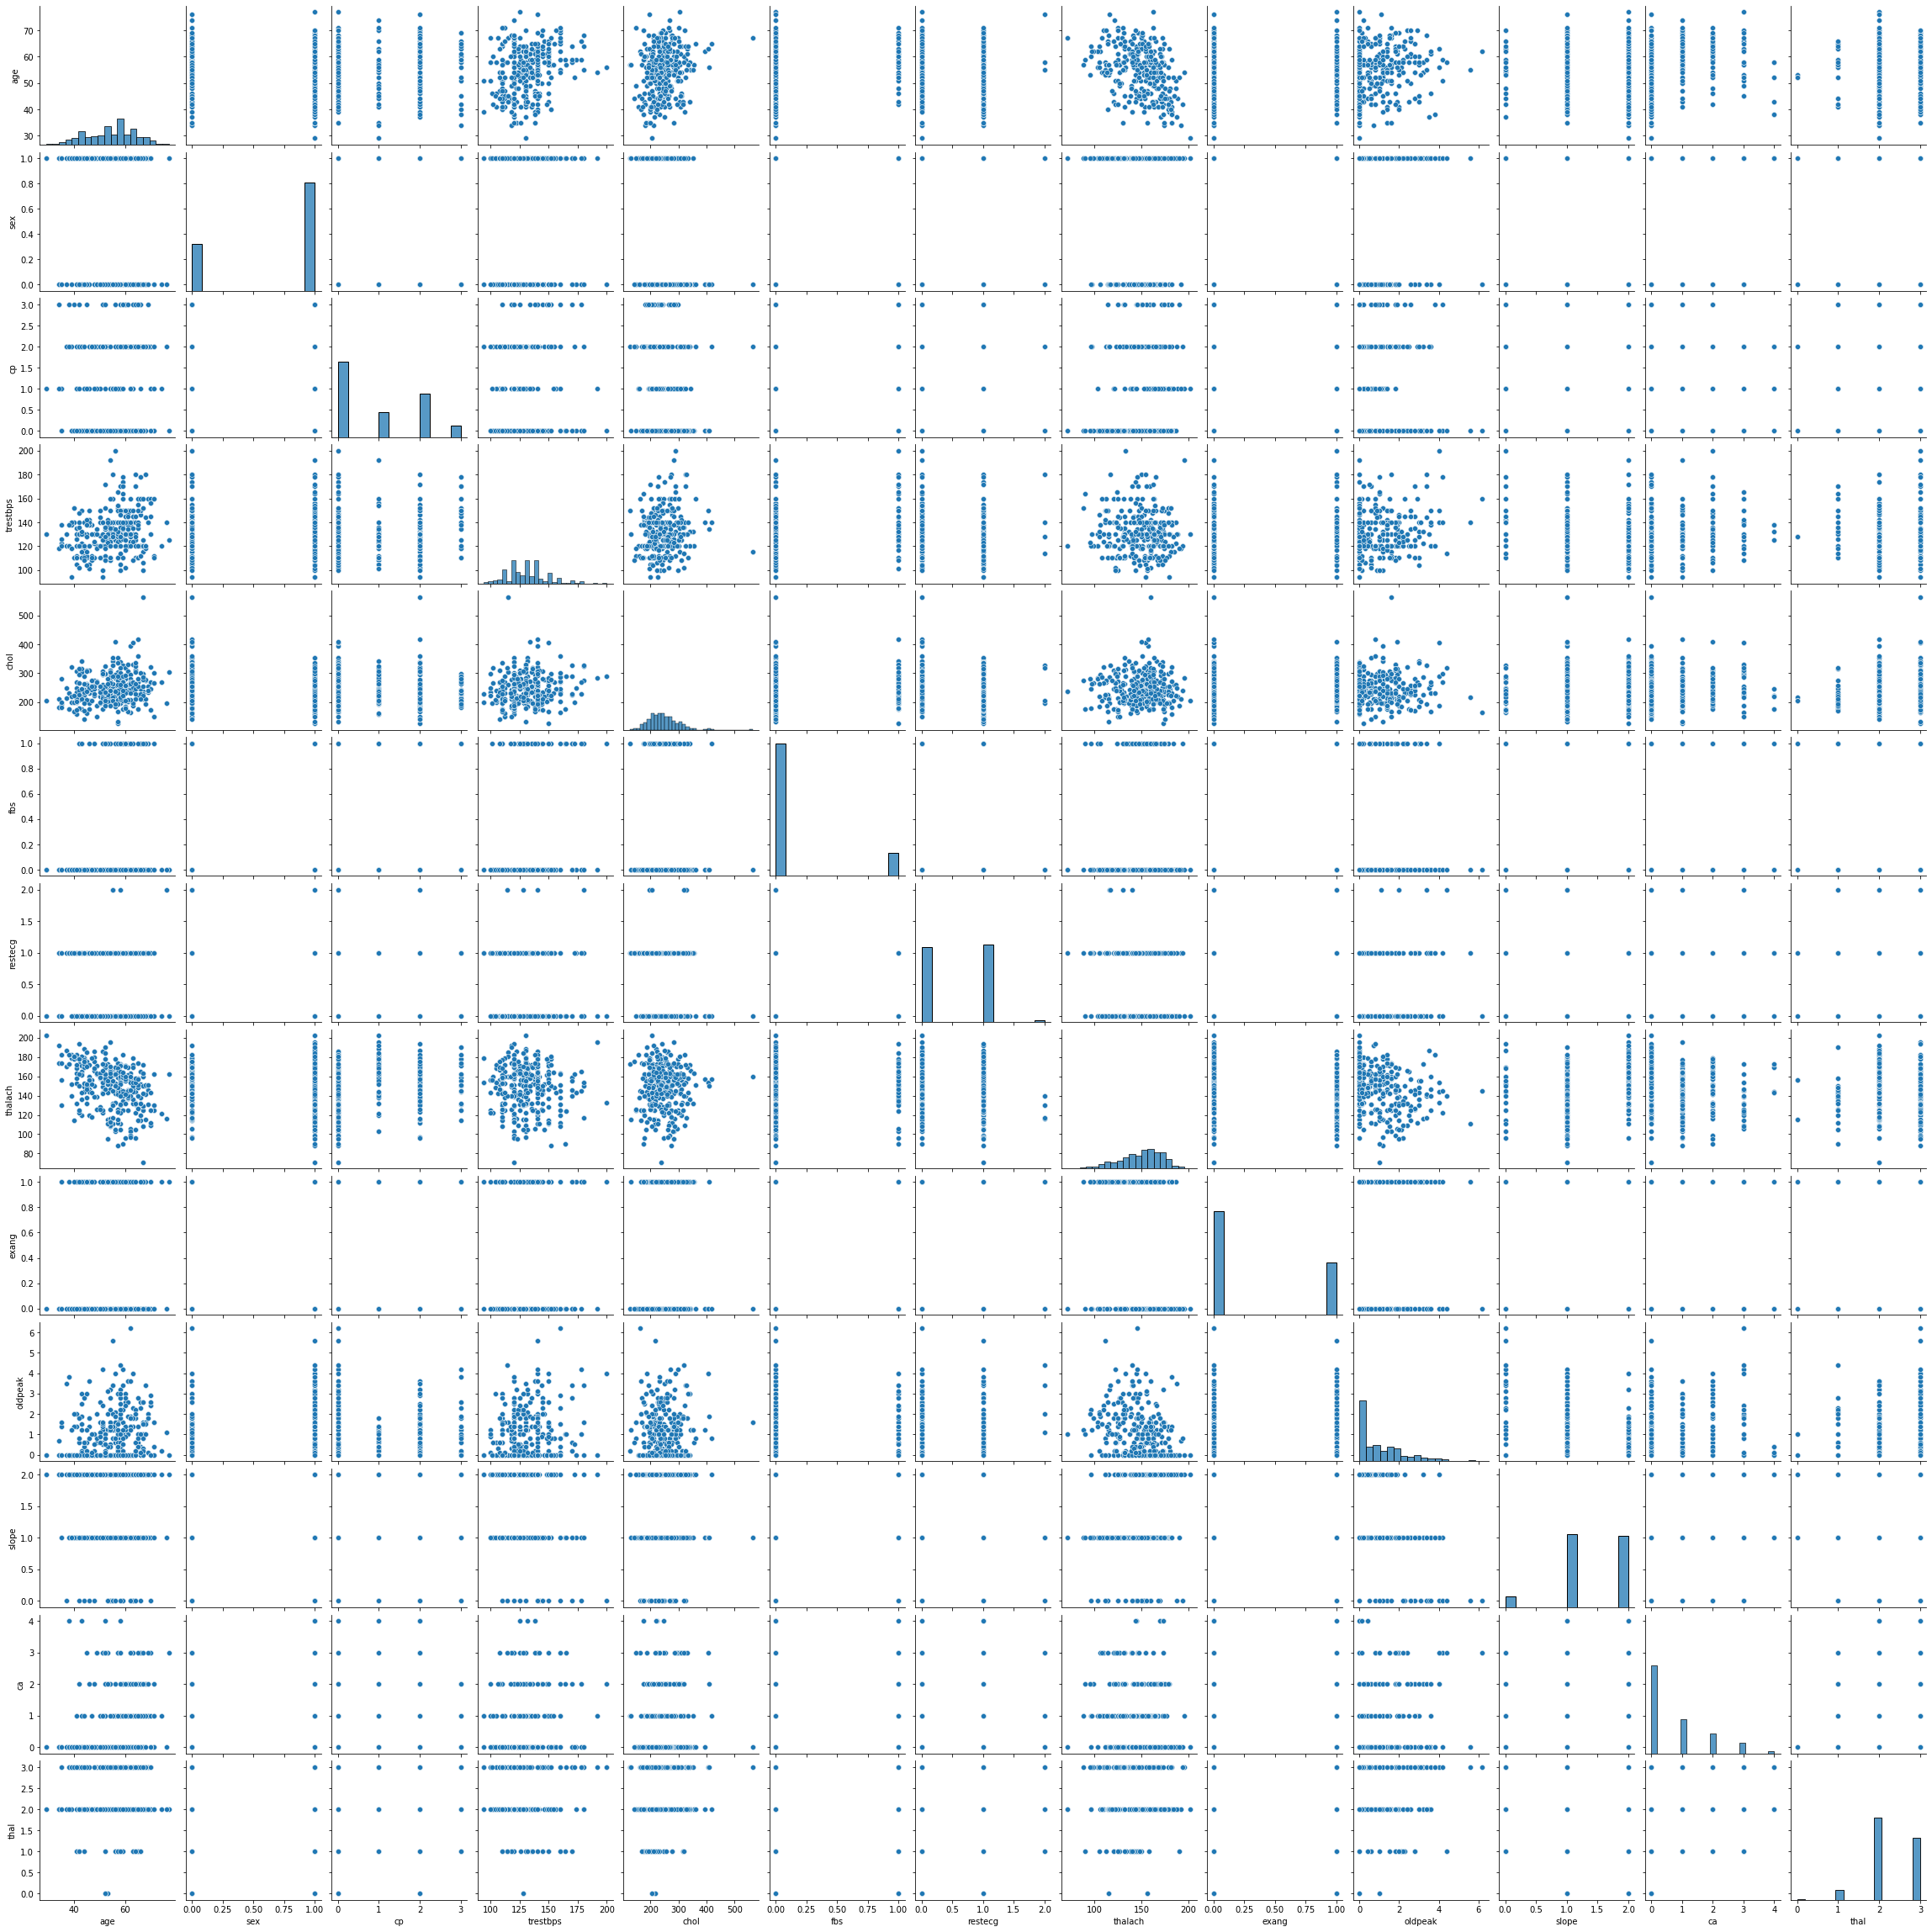

In [16]:
# Let's plot them

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.pairplot(Data)
plt.show()

#Unsupervised Learning

##Clustering Algorithms
1. DBSCAN( Density based spatial clustering of applications with noise)
2. k-mean
3. Agglomerative

#***DBSCAN***

In [17]:
pre=Preprocess(Data)
data=pre.fit()
from sklearn.cluster import DBSCAN
import numpy as np

list_min_samples=[200, 150, 100 ,75, 50, 35, 25]
list_eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1.0,1.1,1.2,1.3,1.5,2,2.5,3,4,5,6,7,8,9,10]
for min_samples in list_min_samples:
  print("\nMin Samples:{}".format(min_samples))
  for eps in list_eps: 
    print("\neps:{}".format(eps))
    model=DBSCAN(eps=eps, min_samples=min_samples)
    clusters=model.fit_predict(data)
    if len(np.unique(clusters))>=2 and len(np.unique(clusters))<=5: 
      print("\neps:{}".format(eps))
      print("Unique Members:\n{}".format(np.unique(clusters)))
      print("Data points under each members:\n{}".format(np.bincount(clusters+1)))



Min Samples:200

eps:0.1

eps:0.2

eps:0.3

eps:0.4

eps:0.5

eps:0.6

eps:0.7

eps:0.9

eps:1.0

eps:1.1

eps:1.2

eps:1.3

eps:1.5

eps:1.5
Unique Members:
[-1  0]
Data points under each members:
[667 358]

eps:2

eps:2
Unique Members:
[-1  0]
Data points under each members:
[ 65 960]

eps:2.5

eps:3

eps:4

eps:5

eps:6

eps:7

eps:8

eps:9

eps:10

Min Samples:150

eps:0.1

eps:0.2

eps:0.3

eps:0.4

eps:0.5

eps:0.6

eps:0.7

eps:0.9

eps:1.0

eps:1.1

eps:1.2

eps:1.3

eps:1.5

eps:1.5
Unique Members:
[-1  0  1]
Data points under each members:
[340 517 168]

eps:2

eps:2
Unique Members:
[-1  0]
Data points under each members:
[ 48 977]

eps:2.5

eps:3

eps:4

eps:5

eps:6

eps:7

eps:8

eps:9

eps:10

Min Samples:100

eps:0.1

eps:0.2

eps:0.3

eps:0.4

eps:0.5

eps:0.6

eps:0.7

eps:0.9

eps:1.0

eps:1.1

eps:1.1
Unique Members:
[-1  0  1]
Data points under each members:
[843 123  59]

eps:1.2

eps:1.2
Unique Members:
[-1  0  1]
Data points under each members:
[831 119  75]

ep

# Results


1.   3 clusters at:(min_Sample=50,eps=1.5)
2.   2 clusters at: (min_Sample=75,eps=1.3), (min_Sample=35,eps=1.3)

### Where clusters are grouping and we can sense that there are 2 cluster atleast where one is large in size(May be less-risky ones) and anothere is smaller(may be more risky ones).
Don't worry we can't analyse these cluster they need experts in the field. If you have one go further and label the clusters and so on.... Good luck!


There are more clustering algorithms but DBSCAN is good enough to cluster. But rest are also satisfactory.



In [18]:
# Demo
demo_data=raw_data
#training

demo_target=demo_data.target
demo_features=demo_data.drop("target",axis=1)

demo_features.reset_index(inplace=True,drop=True)

demo_target=demo_target.reset_index(drop=True)

#preprocess
processordemo= Preprocess(data=demo_features)
t_data=processordemo.fit( k=1,StandardScaler=False, MinMaxScaler=True)

#model
print(t_data.head())

demo_model=RandomForestClassifier(n_estimators=170)

demo_model.fit(t_data,demo_target)
print()


   sex  cp  fbs  ...  Scaled_chol  Scaled_thalach  Scaled_oldpeak
0    1   0    0  ...     0.196347        0.740458        0.161290
1    1   0    1  ...     0.175799        0.641221        0.500000
2    1   0    0  ...     0.109589        0.412214        0.419355
3    1   0    0  ...     0.175799        0.687023        0.000000
4    0   0    1  ...     0.383562        0.267176        0.306452

[5 rows x 13 columns]



In [20]:
#Runner
url = "https://github.com/SrijanxxxSharma/Heart_disease_classification/raw/main/Test_demo.csv"
sample_data=pd.read_csv(url)
sample_data

#preprocess
processordemo1= Preprocess(data=sample_data)
st_data=processordemo1.fit( k=1,StandardScaler=False, MinMaxScaler=True)
print(st_data.head())

#predictions

sample_predictions=demo_model.predict(st_data)
print(sample_predictions)



   sex  cp  fbs  ...  Scaled_chol  Scaled_thalach  Scaled_oldpeak
0    1   0    0  ...     0.352941        1.000000        0.227273
1    1   0    1  ...     0.294118        0.872340        0.704545
2    1   0    0  ...     0.000000        0.234043        0.590909
3    1   0    0  ...     0.235294        0.765957        0.000000
4    0   0    1  ...     0.647059        0.000000        0.431818

[5 rows x 13 columns]
[0 0 0 0 0 1 0 0]
